<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_6_Sat_Porc_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

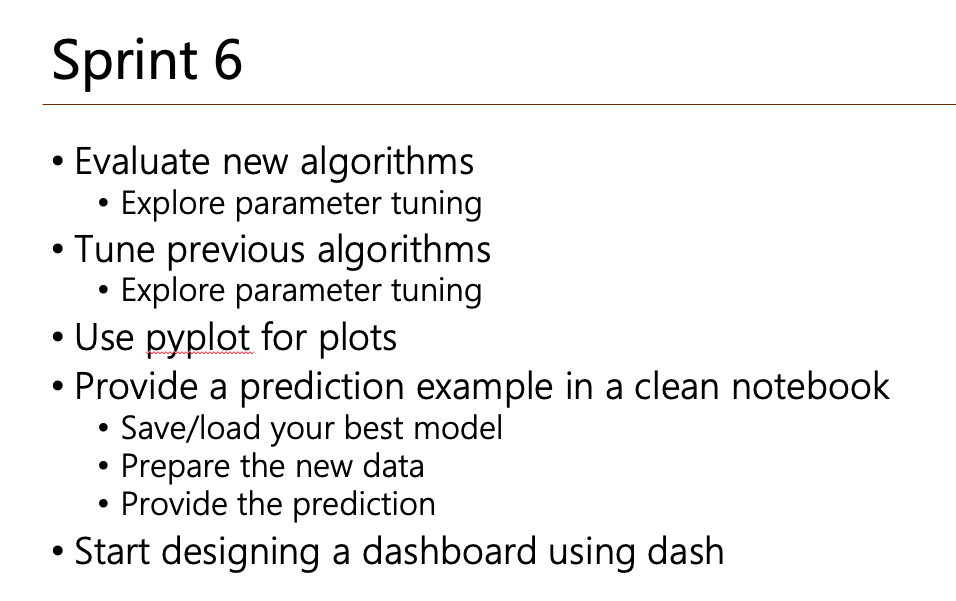

# Usefull links

*   https://colab.research.google.com/github/ahmadkhan242/jupyter_widgets/blob/main/jupyter_widgets.ipynb#scrollTo=UfOucuOo8-Cl

*   https://towardsdatascience.com/4-easy-steps-for-implementing-catboost-c196fd82274b






# Library

## Pip Install

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
!pip install catboost

In [ ]:
!pip install ipywidgets

In [ ]:
!jupyter nbextension enable  — py widgetsnbextension

Please specify one nbextension/package at a time


## Packages

In [ ]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display

In [64]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics 
import numpy as np  
import matplotlib.pyplot as plt

# Data

In [ ]:
dataframe = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
dataframe.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,1/1/17,1.503548,0.699923,112579.4297,11303,1185131,3587,7716,229478,955653,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044530e+11,1.323490e+11,1.727680e+11,1.050910e+11,8.847567e+10,8.354725e+10,50084436328,9.372000e+10,30371154877,31360154924,1.585430e+11,1.050760e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2/1/17,0.076213,0.316156,113438.0949,16187,1590979,4659,11528,272961,1318018,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574850e+11,8.351517e+10,1.096910e+11,8.252536e+10,8.582517e+10,1.522090e+11,50567057384,6.034851e+10,21382430962,22163642219,2.104630e+11,1.036180e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,3/1/17,-1.346258,-0.267695,114667.2587,15231,1438528,5687,9544,354904,1083624,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215370e+11,9.821204e+10,1.191500e+11,9.035507e+10,9.516119e+10,1.388750e+11,52669677767,1.137230e+11,28723642312,22588768481,1.192190e+11,1.000210e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,1,4,26


# Pre Processing

move date to index

Subset data

Change Qty

In [ ]:
# move date to 
#df.set_index('month')
dataframe = dataframe.set_index('date')

In [ ]:
dataframe = dataframe[[ 'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4' ]]

In [ ]:
dataframe.at[39,'Quantity'] = -1.3035153046741994

In [ ]:
dataframe.head(3)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
date,,,,,
1/1/17,1.503548,0.699923,502084.8330,102.548972,69.107759
2/1/17,0.076213,0.316156,530826.1625,102.919033,61.576356
3/1/17,-1.346258,-0.267695,568447.4880,102.162670,57.195909


In [ ]:
dataframe.shape

(55, 5)

In [ ]:
55 * .75

41.25

# Split

In [ ]:
y = dataframe['Quantity']
X = dataframe.loc[: ,dataframe.columns != 'Quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

Apply Model
the most important part is to designate your categorical variables, so that you can get the most out of your CatBoost model.

CatBoost has some awesome plots that visualize the error metric improvements over iterations, so if you want to visually see how the train and test set compare over time, setting the plot to True

## Here are the main model commands:

In [ ]:
#CAT_FEATURES = [Feature_Names.0] #list of your categorical features



# set up the model
catboost_model = CatBoostRegressor(n_estimators=100,
                                   loss_function = 'RMSE',
                                   eval_metric = 'RMSE')
                                   #cat_features = CAT_FEATURES)

In [ ]:
# fit model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   use_best_model = True,
                   plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.125633
0:	learn: 0.9940085	test: 0.8523070	best: 0.8523070 (0)	total: 46.3ms	remaining: 4.58s
1:	learn: 0.9576158	test: 0.8349412	best: 0.8349412 (1)	total: 46.8ms	remaining: 2.29s
2:	learn: 0.9184931	test: 0.8090773	best: 0.8090773 (2)	total: 47.2ms	remaining: 1.53s
3:	learn: 0.8941237	test: 0.7967835	best: 0.7967835 (3)	total: 47.6ms	remaining: 1.14s
4:	learn: 0.8650808	test: 0.7900863	best: 0.7900863 (4)	total: 47.9ms	remaining: 911ms
5:	learn: 0.8406624	test: 0.7792605	best: 0.7792605 (5)	total: 48.3ms	remaining: 757ms
6:	learn: 0.8124855	test: 0.7539197	best: 0.7539197 (6)	total: 48.6ms	remaining: 645ms
7:	learn: 0.7866519	test: 0.7354392	best: 0.7354392 (7)	total: 48.8ms	remaining: 561ms
8:	learn: 0.7598118	test: 0.7010839	best: 0.7010839 (8)	total: 49ms	remaining: 495ms
9:	learn: 0.7337147	test: 0.6903909	best: 0.6903909 (9)	total: 49.3ms	remaining: 443ms
10:	learn: 0.7110969	test: 0.6899271	best: 0.6899271 (10)	total: 49.4ms	remaining: 400ms
11:	learn: 0.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# get your predictions
preds = catboost_model.predict(X_test)

In [ ]:
preds

array([ 0.43874328, -0.58262884,  0.42949485, -0.1250164 , -0.22791917,
        0.50210145, -0.52849225, -0.33300017, -0.17433587,  0.04908679,
       -0.53776775, -0.91610083,  0.60272138,  0.50227282])

In [ ]:
# The data was split 0.75 = Train set
# The X test comes to 13.75 hence the 14  items in "preds"
55 * 0.25


13.75

### B
Here i will attempt to plug in juan;s code

# Juan's functions

In [ ]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

In [ ]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [ ]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [ ]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

## Stadardiztion (Juan's functions will be looking for these)


### Training Set Mean

In [ ]:
mean = X_train.mean()
print(mean)

Seasonal                                 -0.007304
Gray_cement_dispatch_comercial       540485.571113
ISE                                     105.707051
Construction_lic_area/unt_SIlag_4        62.605747
dtype: float64


<font color = 'blue'>Training Test Standard Deviation
### 


In [ ]:
stdev = X_train.std()
print(stdev)

Seasonal                                 1.050611
Gray_cement_dispatch_comercial       79567.183194
ISE                                      4.942473
Construction_lic_area/unt_SIlag_4        3.488844
dtype: float64


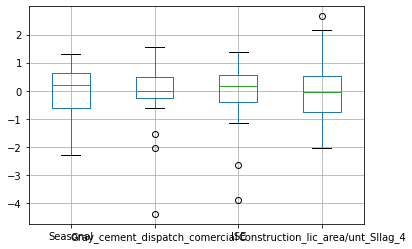

In [ ]:
#run without this for KNN first
X_train_st = (X_train - mean)/stdev 
X_train_st.boxplot()

### Test Set preparations, Notice that test is standardized using training set mean and standard deviations

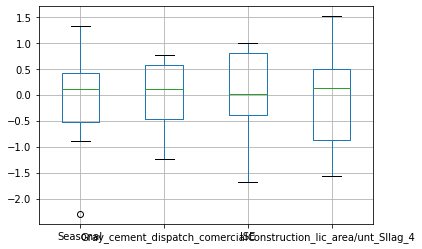

In [ ]:
X_test_st = (X_test - mean)/stdev 
X_test_st.boxplot()

In [ ]:
'''
model = KNeighborsRegressor(n_neighbors=100)
#model = RandomForestRegressor(n_estimators=10) #Number of trees in the forest
#model = ExtraTreesRegressor(n_estimators=10)
#model = GradientBoostingRegressor(n_estimators = 10) #Number of trees in the forest
#model = XGBRegressor(objective="reg:squarederror", random_state=42)
#model = CatBoostRegressor() #Change fit in functions
#model = LGBMRegressor() #Change fit in functions

#Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model,X_train_st,y_train,X_test_st, y_test)
'''

model = catboost_model

Model_Performance(model,X_train_st,y_train,X_test_st, y_test)

### Feature Importance

Learning rate set to 0.5
0:	learn: 0.8643326	total: 771us	remaining: 6.95ms
1:	learn: 0.7484689	total: 1.18ms	remaining: 4.7ms
2:	learn: 0.6504314	total: 1.39ms	remaining: 3.24ms
3:	learn: 0.6118392	total: 1.51ms	remaining: 2.26ms
4:	learn: 0.5359581	total: 1.88ms	remaining: 1.88ms
5:	learn: 0.4965546	total: 2.25ms	remaining: 1.5ms
6:	learn: 0.4495743	total: 2.61ms	remaining: 1.12ms
7:	learn: 0.4106250	total: 2.99ms	remaining: 746us
8:	learn: 0.3789702	total: 3.34ms	remaining: 371us
9:	learn: 0.3412619	total: 3.72ms	remaining: 0us


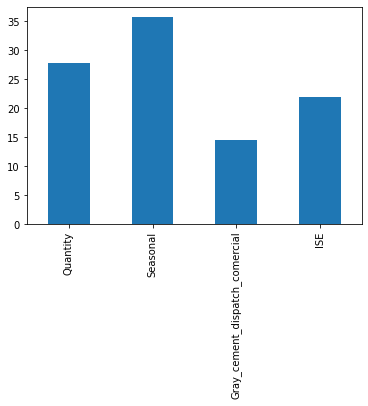

In [ ]:
'''
RegForest = RandomForestRegressor(n_estimators=10)
RegForest.fit(X_train,y_train)

Features = df.columns[0:4]

Feature_importances = pd.Series(RegForest.feature_importances_, index=Features)
Feature_importances.plot.bar()
'''

RegCatBoost = CatBoostRegressor(n_estimators=10)
RegCatBoost.fit(X_train,y_train)

Features = dataframe.columns[0:4]

Feature_importances = pd.Series(RegCatBoost.feature_importances_, index=Features)
Feature_importances.plot.bar()


## Juans CATBoost Section

In [65]:
 Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.7517368146078001
Mean Absolute Error: 0.380960992767719
Mean Squared Error: 0.1960497613375459
Root Mean Squared Error: 0.44277506855913407


### Feature importance

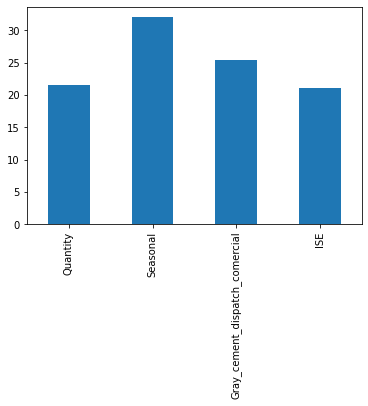

In [66]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

Features = dataframe.columns[0:4]

Feature_importances = pd.Series(cb.feature_importances_, index=Features)
Feature_importances.plot.bar()

## Calling Juans Functions

1.   Model Performance
2.   Metrics
3.   Predicted Plot
4.   Multiple Runs



### Model Performance

In [ ]:
# Juan's ##### MODEL PERFORMANCE #############

Model_Performance(model,X_train,y_train,X_test, y_test)

In [68]:
############## JUAN'S METRICS ###############

y_pred_Test   = model.predict(X_test) 

Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.9976332077577419
Mean Absolute Error: 0.02684811098084606
Mean Squared Error: 0.0018690207873439892
Root Mean Squared Error: 0.04323217305831375


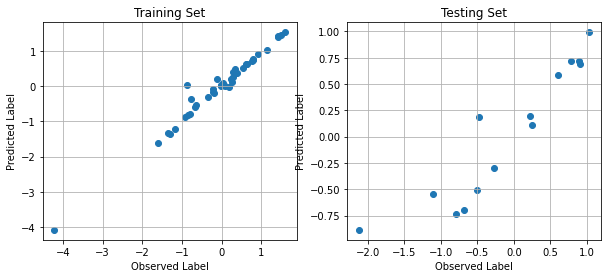

In [72]:
############### PREDICTED PLOT ##################

y_pred_Train  = model.predict(X_train)  #Predictions on training model
y_pred_Test   = model.predict(X_test)
#
Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple Runs

In [ ]:
####################.JUAN'S MULTIPLE RUNS ##################

Multiple_Runs(model,X_train,y_train,X_test, y_test)